# Neural Network

In this notebook we will take a look at the basics of training a neural network. Neural network can handle a range of tasks, from time series forecasting to facial detection. Here we will look at two basic use case - regression and classification to look at how neural network works on a fundamental level. We will be using tensorflow library to build and train neural networks.

## 1. Building the simpliest neural network

### Import libraries and build test data

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [14]:
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14], dtype='float32')
y = X + 10

In [15]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

### Training a basic neural network has three steps

1. Build the neural network model and specify the number of layers, types of layers and number of nodes in the layers
2. Compile the model and specify the loss function, the optimizer and the metrics to display. As in other ML algorithms, when training a model, we are trying to minimize the loss function, and we do so with the optimizer (such as stochastic gradient descent (SGD)). Metrics is a way we measure the performance of the model.
3. Fit the model to the data and specify the epochs. The epoch is the number of iterations to train the model. Alogrithms like stochastic gradient descent are non-deterministic, so we have to specify a point to stop the training. 

In [16]:
model = keras.models.Sequential([                   ## Step 1
    keras.layers.Dense(1)
])
model.compile(loss=keras.losses.mean_squared_error, ## Step 2
             optimizer=keras.optimizers.SGD(),
             metrics=["mse"])
model.fit(X, y, epochs=100)                         ## Step 3

Epoch 1/100
1/1 [==============================] - 0s 298ms/step - loss: 365.5823 - mse: 365.5823
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 85.7904 - mse: 85.7904
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 72.9801 - mse: 72.9801
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 70.3069 - mse: 70.3069
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 68.0847 - mse: 68.0847
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 65.9460 - mse: 65.9460
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 63.8751 - mse: 63.8751
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 61.8692 - mse: 61.8692
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 59.9263 - mse: 59.9263
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 58.0445 - mse: 58.0445
Epoch 11/100
1/1 [==============================] - 0s 

We can call the `summary()` method to view the model structure.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**As with Scikit-learn algorithms, we can simply run predict to get predictions**

In [18]:
model.predict([20])

array([[30.385017]], dtype=float32)

Here we try out the trained model on a bigger dataset. Also we shuffle the order of data to imporve training performance. 

In [19]:
X = tf.range(-100, 100, 4)

tf.random.set_seed(42)

X = tf.random.shuffle(X)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  48, -100,  -24,  -32,   52,   36,  -48,  -52,   56,   16,  -12,
        -40,  -88,  -56,    4,   92,   -8,  -68,  -92,    8,   64,  -96,
         40,  -36,   32,  -44,  -28,   20,    0,  -16,   60,   24,  -72,
         80,   84,   -4,  -64,  -20,   44,   12,   68,   76,   72,  -60,
        -84,   96,  -76,   28,   88,  -80])>

In [20]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 58, -90, -14, -22,  62,  46, -38, -42,  66,  26,  -2, -30, -78,
       -46,  14, 102,   2, -58, -82,  18,  74, -86,  50, -26,  42, -34,
       -18,  30,  10,  -6,  70,  34, -62,  90,  94,   6, -54, -10,  54,
        22,  78,  86,  82, -50, -74, 106, -66,  38,  98, -70])>

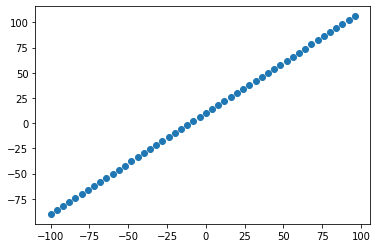

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

#### - Train-test split

In [22]:
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

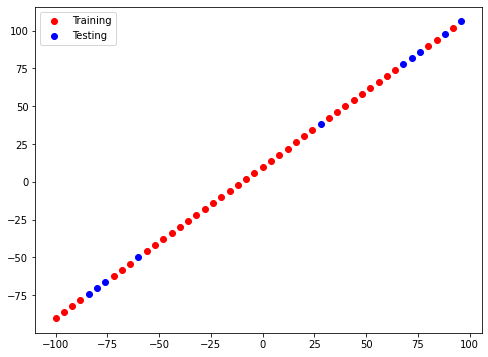

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, c="red", label="Training")
plt.scatter(X_test, y_test, c="blue", label="Testing")
plt.legend()
plt.show()

Here we use the same model structure as before to try and predict the `y` from `x`.

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=keras.losses.mse,
             optimizer=keras.optimizers.Adam(lr=0.11),  ## Adam is another optimizer, lr is learning rate, it refers to how fast the ...
             metrics=["mse"])                           ## ... gradient changes in each training iteration

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 349.0892 - mse: 349.0892
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 134.2728 - mse: 134.2728
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 103.6441 - mse: 103.6441
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 136.5317 - mse: 136.5317
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 127.0465 - mse: 127.0465
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 103.5208 - mse: 103.5208
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 76.8275 - mse: 76.8275
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 72.9567 - mse: 72.9567
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 76.1100 - mse: 76.1100
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 71.3341 - mse: 71.3341
Epoch 11/100
2/2 [=============================

In [25]:
y_pred = model.predict(X_test)
y_pred

array([[ 77.897156],
       [ 85.89345 ],
       [ 81.89531 ],
       [-50.04343 ],
       [-74.03229 ],
       [105.88417 ],
       [-66.035995],
       [ 37.915726],
       [ 97.88788 ],
       [-70.03415 ]], dtype=float32)

In [26]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize = (8, 6))
    plt.scatter(train_data, train_labels, c="blue", label="Training")
    plt.scatter(test_data, test_labels, c="red", label="Testing")
    plt.scatter(test_data, predictions, c="green", label="Predictions")
    plt.legend()
    plt.show()

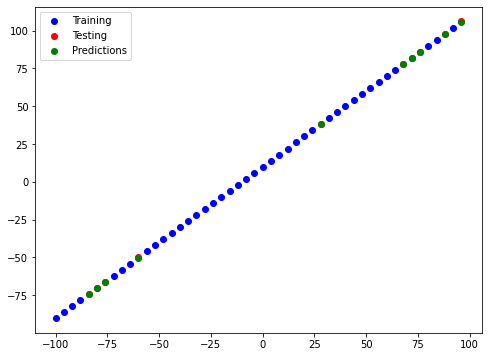

In [27]:
plot_predictions()

We can also use the `evaulate()` method to calculate the model performance. It returns the lost value and metrics that we specified during the compile stage (2nd stage). Since we use mean squared loss for both in this case, they would be the same. 

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 112ms/step - loss: 0.0071 - mse: 0.0071


[0.007137080188840628, 0.007137080188840628]

We can just as easily evaluate their performance with other build-in tensorflow metrics. For example, we can look at the `mean_absoulte_error`.

In [29]:
tf.metrics.mean_absolute_error(y_true = y_test, 
                               y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.07721748>

And if we calculate the `mean_squared_error`, the results will be the same as `evaulate()`.

In [30]:
tf.metrics.mean_squared_error(y_true = y_test, 
                               y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.00713708>

### - Saving and loading trained models

We can save and load trained models, and all the trained values can be save for later use. So we can train a model in one place, save it and deploy it in another place.

In [31]:
model.save("best_model.h5")

In [32]:
new_model = keras.models.load_model("best_model.h5")

In [33]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
new_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 79ms/step - loss: 0.0071 - mse: 0.0071


[0.007137080188840628, 0.007137080188840628]

In [35]:
model.predict([60]) == new_model.predict([60])

array([[ True]])

As we can see, the saved model is completely identical to the one we trained. 

# 2. Regression - Insurance Data

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

We will use the `Medical Cost Personal` datasets and use attributes such as age, gender and bmi to predict what the medical cost billed by insurance will be.

In [37]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Briefly scanning the data we can see that age, children and bmi are continuous variables, but they are on different scales. Therefore, we will have to normalize them. Sex, smoker and region are categorical, and we will have to use one-hot encoding so that they can be fed into the neural network model.

In [38]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn values in these columns into values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)  # X = insurance.loc[:, insurance.columns != "charges"]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
## Fit column transformer to training data
ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

Here we add some complexities to our model since we are using data with more parameters. We will have four layers and 20 nodes in the first three layers. The last layer will only have one node since it's the output layer, and we are only predicting one value per entry.

In [40]:
tf.random.set_seed(42)

insurance_model = keras.models.Sequential([
    keras.layers.Dense(20, activation="relu"),    ## Activation function is a mathematical formula to determine whether ...
    keras.layers.Dense(20, activation="relu"),    ## ... the node in a layer should be activated given the input, and also the function to approximate
    keras.layers.Dense(20, activation="relu"),    ## Popular activation function includes ReLu, Tanh and Sigmoid
    keras.layers.Dense(1),
])

insurance_model.compile(loss=keras.losses.mean_squared_error,
                       optimizer=keras.optimizers.Adam(lr=0.01),
                       metrics=["mae"])

history = insurance_model.fit(X_train_norm, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 318121133.7143 - mae: 13286.9003
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 286614968.6857 - mae: 12040.2629
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 133216312.9143 - mae: 8079.5479
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 122955385.6000 - mae: 8491.6223
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 89299490.0571 - mae: 7522.2550
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 67931602.5143 - mae: 6331.4455
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 44059052.9143 - mae: 5159.1965
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 42349111.3143 - mae: 4521.4477
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 36894515.2000 - mae: 4047.4730
Epoch 10/100
34/34 [==============================] - 0s 1

In [41]:
insurance_model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 20023824.0000 - mae: 2391.7300


[20023824.0, 2391.72998046875]

Text(0, 0.5, 'Loss')

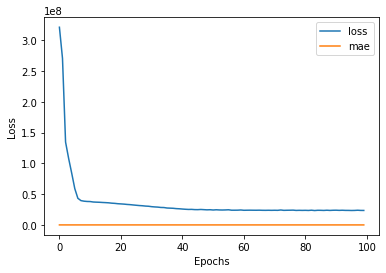

In [42]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

From the graph, we can see the performance of the model improves significantly up to around the 15th epochs, then it starts to level off. The mean absolute error is about 2400. That means on average, the predictions of medical costs are off by around 2400 USD. You can try to improve the model (reduce error) by tuning the model parameters, such as the activation function to use, training iterations or even the number of layers and nodes in the model.

## 3. Classification

Apart from regression, we can also use neural networks for classification tasks. We demonstrate this with by using `make_circles` function from `Scikit-learn`. 

In [43]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03, 
                   random_state=42)

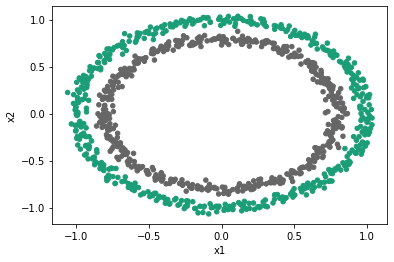

In [44]:
pd.DataFrame(X, columns=["x1", "x2"]).plot.scatter(x="x1", y="x2", c=y, cmap="Dark2", colorbar=False)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[2]),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),     ## Since this is a binary classification tasks, the output layer will have 1 layer ...
    keras.layers.Dense(1, activation="sigmoid")   ## ... with a sigmoid activation function to output probabilities from 0 to 1. 
])

model.compile(loss=keras.losses.BinaryCrossentropy(),
             optimizer=keras.optimizers.Adam(0.1),
             metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, verbose=0) ## verbose=0 prevents printing the training process, default is 1
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.6800


[0.5450977683067322, 0.6800000071525574]

The metrics we use, accuracy, is 52%. This means the model is 52% accurate in distinguishing between green and black data points.

## Plot Decision Boundary

In [47]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap="Dark2", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="Dark2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


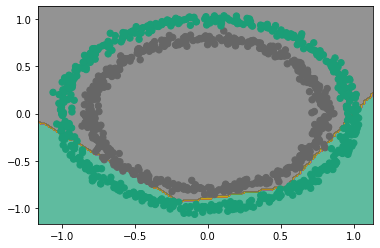

In [48]:
plot_decision_boundary(model=model, X=X, y=y)

This model is unable to distinguish between decision boundaries, the boundary is all blue for both classes of points. 

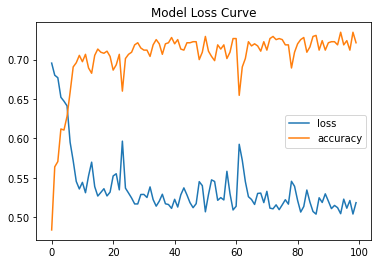

In [49]:
pd.DataFrame(history.history).plot()
plt.title("Model Loss Curve")
plt.show()

### Parameter Tuning - Finding the best learning rates

The idea of learning rate tuning is to find the optimum rate at which the loss decrease is the steepest, i.e. fastest to reach model convergence. To do this, we need to decrease the learning rate while the model is training. This is where **callbacks** come in. **Callbacks** are functions added to the model that are called while the model is training.

In [50]:
tf.random.set_seed(42)

## Build model
model_01 = tf.keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

## Compile model
model_01.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

## Learning Rate Callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20), ## The learning rate will start from 1e-4, then increases by ...
                                                     verbose=1)                           ## ... 10 to the power of (epoch/20)

## Train model
history_01 = model_01.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
24/24 [==============================] - 0s 999us/step - loss: 0.6911 - accuracy: 0.4935
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00011220184543019634.
24/24 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4905
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00012589254117941674.
24/24 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4972
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00014125375446227543.
24/24 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4671
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00015848931924611136.
24/24 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5123
Epoch 6/100

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0001778279410

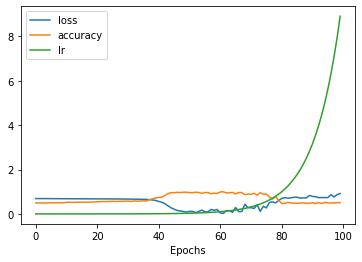

In [51]:
pd.DataFrame(history_01.history).plot()
plt.xlabel("Epochs")
plt.show()

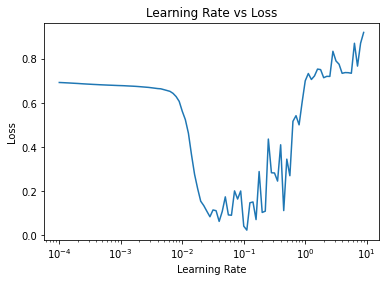

In [52]:
model_01_summary = pd.DataFrame(history_01.history)
plt.semilogx(model_01_summary["lr"], model_01_summary["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

A rule of thumb for picking the optimal value - 10 times smaller than the lowest point on the graph so that the loss is still decreasing and not leveled off. The lowest point is 0.1, so we should pick a learning rate of around 0.01.

In [53]:
tf.random.set_seed(42)

## Build model
model_02 = tf.keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

## Compile model
model_02.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

## Learning Rate Callback
#lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

## Train model
history_02 = model_02.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5178
Epoch 2/20
24/24 [==============================] - 0s 1000us/step - loss: 0.6760 - accuracy: 0.6151
Epoch 3/20
24/24 [==============================] - 0s 957us/step - loss: 0.6731 - accuracy: 0.5643
Epoch 4/20
24/24 [==============================] - 0s 957us/step - loss: 0.6682 - accuracy: 0.5916
Epoch 5/20
24/24 [==============================] - 0s 1000us/step - loss: 0.6570 - accuracy: 0.5735
Epoch 6/20
24/24 [==============================] - 0s 957us/step - loss: 0.6520 - accuracy: 0.6310
Epoch 7/20
24/24 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6395
Epoch 8/20
24/24 [==============================] - 0s 870us/step - loss: 0.6147 - accuracy: 0.7254
Epoch 9/20
24/24 [==============================] - 0s 913us/step - loss: 0.5791 - accuracy: 0.7352
Epoch 10/20
24/24 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7890
Epo

In [54]:
model_02.evaluate(X_test, y_test)

8/8 [==============================] - 0s 834us/step - loss: 0.1618 - accuracy: 0.9840


[0.1617555469274521, 0.984000027179718]

Just changing the learning rate, we increased the accuracy from around 50% to 98%! This shows the importance of finding a good learning rate. When the rate is too large, it may bounce around the optimal convergence point but never reach it as the step it takes are too large. When it's too small, it may take a really long time to converge as the steps are too small.
Now let's plot the decision boundary once again.

doing binary classifcation...
doing binary classifcation...


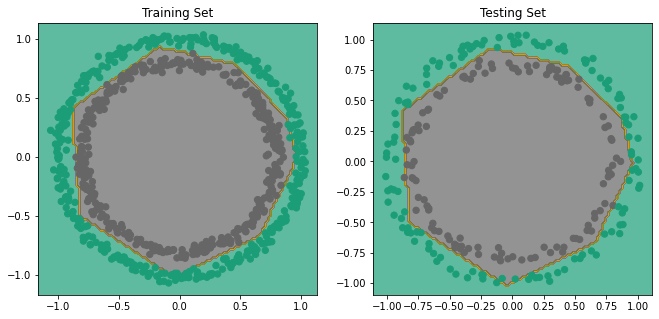

In [55]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.title("Training Set")
plot_decision_boundary(model_02, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Set")
plot_decision_boundary(model_02, X_test, y_test)
plt.show()

Now the decision boundary sets clearly between the two classes of points, it also shows the ability of neural networks to model curved boundaries. This is mostly thanks to its activation functions that can transform linear data.

### - Accuracy

In [56]:
loss, accuracy = model_02.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 999us/step - loss: 0.1618 - accuracy: 0.9840
Loss: 0.1617555469274521
Accuracy: 98.40%


### - Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

y_preds = np.round(model_02.predict(X_test))
confusion_matrix(y_test, y_preds)

array([[127,   2],
       [  2, 119]], dtype=int64)

In [58]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None,figsize=(10, 10)):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Greens) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)
    
    # Set labels to be classess
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=10)

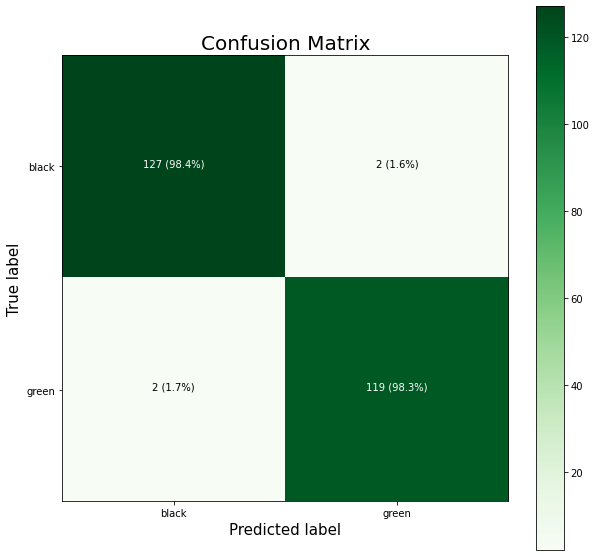

In [59]:
make_confusion_matrix(y_test, y_preds, ["black", "green"])

# Multiclass Classification - Fashion MNIST Dataset

The `Fashion MNIST` dataset contains images of clothing items such as shirts, coats and shoes. The images are stored as arrays of pixels, and our goal is to classify them with neural network classification.

In [60]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

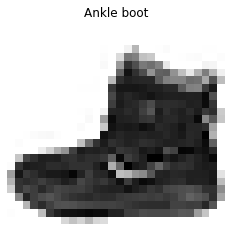

In [62]:
plt.imshow(X_train[0], cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

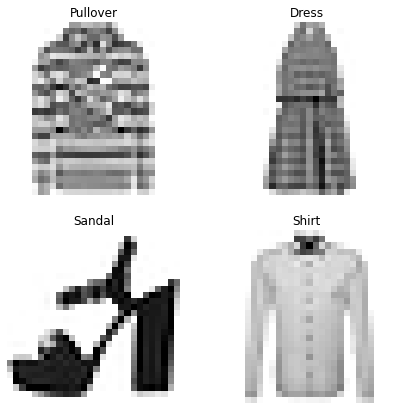

In [63]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap="binary")
    plt.title(class_names[y_train[rand_index]])
    plt.axis("off")
plt.show()

The images are stored as rdb arrays of rbg values, which scales from 0 to 255. So we divide the images by 255 to normalize them.

In [64]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [65]:
tf.random.set_seed(42)

## Build Model
mc_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")   ## For multiclass classification tasks, we usually use softmax as the output layer, and 10 nodes for 10 classes
])

## Compile Model
mc_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

## Fit model
history_mc = mc_model.fit(X_train_norm, y_train, epochs=10)
mc_model.evaluate(X_test_norm, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0870 - accuracy: 0.6025
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4613 - accuracy: 0.8371
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4341 - accuracy: 0.8474
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4116 - accuracy: 0.8567
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4049 - accuracy: 0.8580
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4004 - accuracy: 0.8577
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3829 - accuracy: 0.8642
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3830 - accuracy: 0.8642
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3838 - accuracy: 0.8630
Epoch 10/10
313/313 [==============================] - 0s 875us/step - loss: 0.422

[0.42218804359436035, 0.8513000011444092]

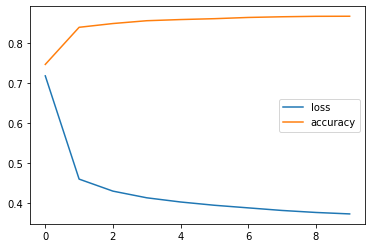

In [66]:
pd.DataFrame(history_mc.history).plot()
plt.show()

## Finding the best learning rate

We will repeat what we did above to find the optimum learning rate.

In [67]:
tf.random.set_seed(42)

## Build Model
mc_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

## Compile Model
mc_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer=keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

## Learning rate scheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20), verbose=1)

## Fit model
history_mc = mc_model.fit(X_train_norm, 
                          y_train, 
                          epochs=50,
                          validation_data=(X_test_norm, y_test),
                         callbacks=[lr_scheduler])

mc_model.evaluate(X_test_norm, y_test)

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0870 - accuracy: 0.6025 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0011220184543019635.
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4638 - accuracy: 0.8357 - val_loss: 0.5205 - val_accuracy: 0.8259
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0012589254117941673.
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4373 - accuracy: 0.8454 - val_loss: 0.4628 - val_accuracy: 0.8344
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0014125375446227544.
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4164 - accuracy: 0.8547 - val_loss: 0.4553 - val_accuracy: 0.8389
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0015848931924611136.
1875

[1.7685388326644897, 0.19840000569820404]

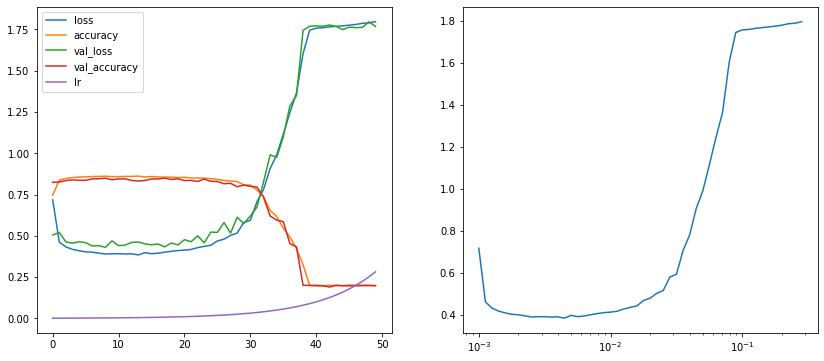

In [68]:
history_df = pd.DataFrame(history_mc.history)

figs, axes = plt.subplots(1, 2, figsize=(14, 6))
history_df.plot(ax=axes[0])
plt.semilogx(history_df["lr"], history_df["loss"])
plt.show()

In [93]:
tf.random.set_seed(42)

## Build Model
mc_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

## Compile Model
mc_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer=keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

## Fit model
history_mc = mc_model.fit(X_train_norm, 
                          y_train, 
                          epochs=30,
                          validation_data=(X_test_norm, y_test))

Epoch 1/30
1875/1875 [==============================] - 2s 801us/step - loss: 1.0870 - accuracy: 0.6025 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/30
1875/1875 [==============================] - 2s 820us/step - loss: 0.4613 - accuracy: 0.8371 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/30
1875/1875 [==============================] - 2s 945us/step - loss: 0.4341 - accuracy: 0.8474 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/30
1875/1875 [==============================] - 2s 931us/step - loss: 0.4116 - accuracy: 0.8567 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/30
1875/1875 [==============================] - 2s 839us/step - loss: 0.4049 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/30
1875/1875 [==============================] - 2s 814us/step - loss: 0.4004 - accuracy: 0.8577 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/30
1875/1875 [==============================] - 1s 779us/step - loss: 0.3829 - accuracy: 0.8642 - val_loss: 0.4507 -

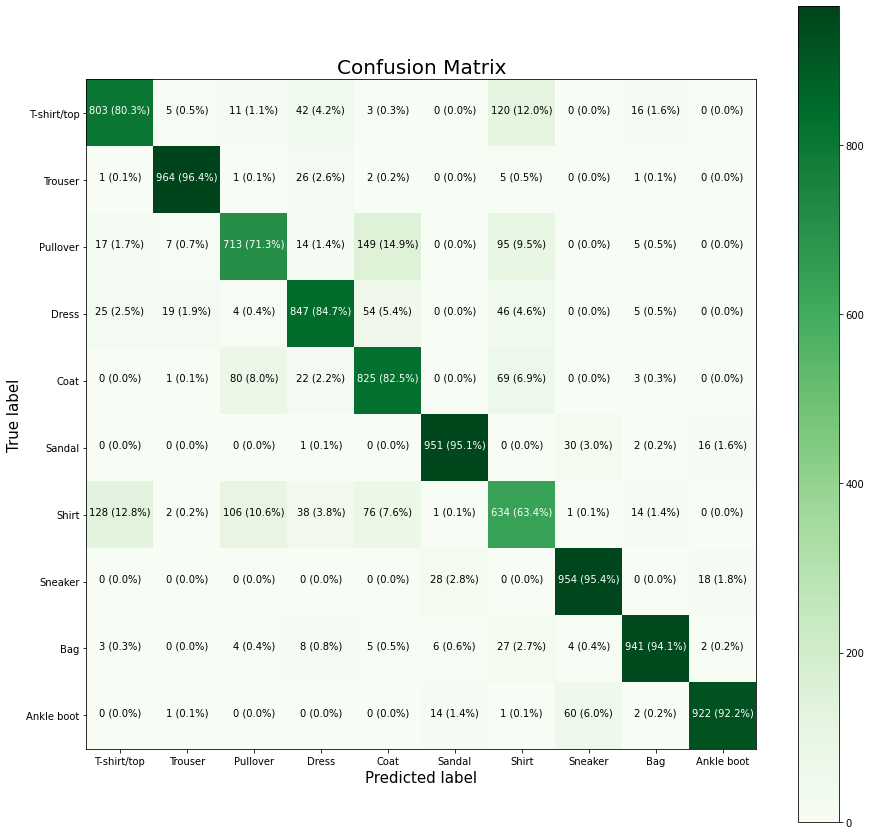

In [70]:
y_pred = np.argmax(mc_model.predict(X_test_norm), axis=1)
make_confusion_matrix(y_test, y_pred, class_names, figsize=(15, 15))

From the confusion matrix, the class with the lowest accuracy is shirt (63.4%), and it's most often misclassified as t-shirts (12.8%) pullovers (10.6%). This is unsurprising, as they would have similar general shape. Similarly, pullovers and t-shirts are also often misclassified as shirts. 

In [71]:
def plot_random_image(model, images, true_labels, classes):
    
    ## Set up random integers
    i = random.randint(0, len(images))
    
    ## Create predictions and targets
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[np.argmax(pred_prob)]
    true_label = classes[true_labels[i]]
    
    ## Plot the images
    plt.imshow(target_image, cmap="binary")
    
    ## Change the color of title depending on predictions is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.title(f"True Label: {true_label}")
    plt.xlabel(f"Predicted: {100*tf.reduce_max(pred_prob):2.0f} % - {pred_label}", color=color)

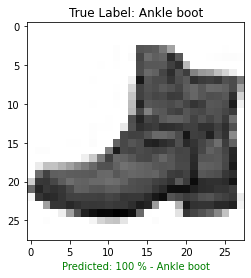

In [72]:
plot_random_image(model=mc_model,
                 images=X_test,
                 true_labels=y_test,
                 classes=class_names)

## What patterns is our model learning?

We can inspect the parameters that have been trained in our network with the `layers` command.

In [73]:
mc_model.layers

In [74]:
weights, biases = mc_model.layers[1].get_weights()
weights, weights.shape

(array([[ 0.02861048,  0.49554217, -0.64718205, ..., -0.4499592 ,
          0.18077745,  0.05632136],
        [-0.3776146 , -0.63613826, -0.5058233 , ..., -0.6197428 ,
          0.74561316,  0.19173424],
        [-0.3726377 , -0.4785497 , -0.9077946 , ..., -0.91267276,
          0.7577944 , -0.3874814 ],
        ...,
        [ 0.08222803, -0.73778814, -0.13742545, ...,  0.1036496 ,
          0.21433938, -0.05833107],
        [-0.08068415, -0.67145246, -0.53709954, ...,  0.76555324,
         -0.06684867,  0.03891557],
        [ 0.23210353, -0.6020935 , -0.08204629, ...,  0.00557582,
          0.16268663, -0.39244318]], dtype=float32),
 (784, 10))

### 4. Convolutional Neural Network (CNN)

In image classification, it's very common to use a type of neural network known as the Convolutional Neural Network (CNN). In fact, CNN is used in a lot of tasks related to computer vision. Basic structure of a CNN is composed of layers of convolution and pooling (sort of like image compression). These layers perform feature extraction to get the important features from images. Doing so also reduce the size of the data. We'll also need to flatten the array so that the data can be connected to dense layers. A simple depiction is as follows:

![](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")
Source: MIT-IntroIntoDeepLearning GitHub Repository (https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png)

For CNN, we need image data with four dimensions, therefore we add one with the `np.expand_dims()` function

In [89]:
X_train_cnn = np.expand_dims(X_train_norm, axis=-1)
X_test_cnn = np.expand_dims(X_test_norm, axis=-1)

In [90]:
cnn_model = tf.keras.Sequential([

        ## The first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu'), 

        # The first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        # The second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation="relu"),

        # The second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

In [91]:
cnn_model.compile(optimizer=keras.optimizers.Adam(), 
                  loss=keras.losses.sparse_categorical_crossentropy, 
                  metrics=['accuracy'])
                  
history = cnn_model.fit(X_train_cnn, 
                        y_train, 
                        epochs=30)

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6565 - accuracy: 0.7649
Epoch 2/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3249 - accuracy: 0.8806
Epoch 3/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2844 - accuracy: 0.8940
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2473 - accuracy: 0.9090
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2185 - accuracy: 0.9178
Epoch 6/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1983 - accuracy: 0.9256
Epoch 7/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1752 - accuracy: 0.9344
Epoch 8/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1583 - accuracy: 0.9412
Epoch 9/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1477 - accuracy: 0.9431
Epoch 10/30
1875/1875 [==============================] - 17s 9ms/step - l

In [101]:
cnn_model.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6463 - accuracy: 0.9040


[0.6462550163269043, 0.9039999842643738]

In [95]:
mc_model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 0s 446us/step - loss: 0.4222 - accuracy: 0.8504


[0.4221572279930115, 0.8503999710083008]

Using convolutional network improved both training and testing accuracy, In more complicated applications imvolving images, the advantage of using CNN will become even more prominent. The testing accuracy (\~90%) is lower than training accuracy (\~99%). This is known as over-fitting.

In [99]:
cnn_model2 = tf.keras.Sequential([

        ## The first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu'), 

        # The first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
        tf.keras.layers.Dropout(0.4),         ### New code

        # The second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation="relu"),

        # The second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
        tf.keras.layers.Dropout(0.4),        ### New code

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

In [100]:
cnn_model2.compile(optimizer=keras.optimizers.Adam(), 
                  loss=keras.losses.sparse_categorical_crossentropy, 
                  metrics=['accuracy'])
                  
history = cnn_model2.fit(X_train_cnn, 
                        y_train, 
                        epochs=30)

Epoch 1/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8080 - accuracy: 0.7000
Epoch 2/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4278 - accuracy: 0.8401
Epoch 3/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3795 - accuracy: 0.8593
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3444 - accuracy: 0.8724
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3279 - accuracy: 0.8803
Epoch 6/30
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3148 - accuracy: 0.8833
Epoch 7/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2934 - accuracy: 0.8901
Epoch 8/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2871 - accuracy: 0.8924
Epoch 9/30
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2860 - accuracy: 0.8926
Epoch 10/30
1875/1875 [==============================] - 18s 10ms/step 

In [102]:
cnn_model2.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9160


[0.23280870914459229, 0.9160000085830688]

Although training accuracy decreased, the testing accuracy improved slightly. Dropout is one of many ways to deal with overfitting in neural networks. Try tweaking the parameters to further improve the accuracy!